# Принятие решений в бизнесе на основе данных. Преоретизация гиипоптез и анализ A/B - теста.

Я - аналитик крупного интернет магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Предстоит приоритезировать гипотезы, так же запуск A/B теста и анализ полученых результатов.

В расппоряжении имеется файл **hypothesis** - он содержит 9 гипотез по увеличению выручки интернет-магазина.

Так же файлы **orders** и **visitors** - они потребуются для анализа A/B - теста


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Импортирую файлы

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
hypothesis = pd.read_csv('C:/Users/nadez/Downloads/ab_test/hypothesis.csv')
orders = pd.read_csv('C:/Users/nadez/Downloads/ab_test/orders.csv')
visitors = pd.read_csv('C:/Users/nadez/Downloads/ab_test/visitors.csv')

# Часть 1. Приоретизация гипотез

**Задача:**

Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Открою файл и изучу гипотезы

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведу названия столбцов к нижнему регистру

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами (по 10-бальной шкале):
- **Reach** - скольких пользователей затронет вносимое изменение;
- **Impact** - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- **Confidence** -  насколько вы уверены, что это изменение повлияет на пользователей именно так;
- **Effort** - сколько стоит протестировать эту гипотезу.



# Часть 1.1. Приоретизация гипотез методом ICE

In [6]:
hypothesis['ice'] = (hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


# Часть 1.2. Приоретизация гипотез методом RICE

In [7]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


При применении фреймвока ICE первые 3 места заняли гипотезы 8, 0 и 7.

При применении фреймвока RICE ситуация изменилась, гипотезы расположились так: 7, 2, 0.



Это случилось потому что параметр **reach** у гипотезы 7 равен 10. Т.е. при использовании метода ICE учитывается только влияние, но не учитывается отхват. В конкретном случае стоит опираться на оценки по методу RICE.



# Часть 2. Анализ A/B-теста

**Задача**:

Проанализируйте A/B-тест:

1) Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

2) Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

3) Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

4) Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.

5) Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

6) Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

7) Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

8) Построить точечный график стоимостей заказов. Сделать выводы и предположения.

9) Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

10) Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

11) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

12) Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

13) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

14) Принять решение по результатам теста и объяснить его. 
    Варианты решений: 
    
    1. Остановить тест, зафиксировать победу одной из групп.
    
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    
    3. Продолжить тест.

Открою и изучу файлы, проверю типы данных, пропусков и дубликатов

In [8]:
for data in [orders, visitors]: print(data.head(), end='\n\n')

   transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
3  3797467345     1196621759  2019-08-15  9759     B   
4  2282983706     2322279887  2019-08-15  2308     B   

         date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
3  2019-08-04  A     717     
4  2019-08-05  A     756     



In [9]:
for data in [orders, visitors]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None



In [10]:
for data in [orders, visitors]: print(data.duplicated().sum(), end='\n\n')

0

0



In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.columns = orders.columns.str.lower()

Пропуски и дубликаты отсутствуют. Столбцы с датой привёл к нужному типу.

### Описание данных:

#### Таблица orders:

- **transactionid** — идентификатор заказа;

- **visitorid** — идентификатор пользователя, совершившего заказ;

- **date** — дата, когда был совершён заказ;

- **revenue** — выручка заказа;

- **group** — группа A/B-теста, в которую попал заказ.


#### Таблица visitors:

- **date** — дата;

- **group** — группа A/B-теста;

- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста



# 2.1. График кумулятивной выручки по группам

Создам датафрейм **dates_groups** с уникальными парами значений 'date' и 'group' таблицы orders

In [12]:
dates_groups = orders[['date', 'group']].drop_duplicates().sort_values(by=['date', 'group'])

Найду кумулятивные показатели в таблице orders, переменную назову **orders_aggregated**

In [13]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transactionid':'nunique', \
'visitorid':'nunique', 'revenue':'sum'}), axis = 1).sort_values(by=['date', 'group'])
orders_aggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transactionid':'nunique', \
'visitorid':'nunique', 'revenue':'sum'}), axis = 1).sort_values(by=['date', 'group'])
orders_aggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']


Найду кумулятивные показатели в таблице orders, переменную назову **visitors_aggregated**

In [14]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
visitors['group'] == x['group'])]
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1).sort_values(by=['date', 'group'])

Объединю данные в переменной **cummulative_data**

In [15]:
cummulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulative_data.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


Создам датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах **А** и **В**

In [16]:
cummulative_data_a = cummulative_data[cummulative_data['group']=='A'][['date', 'revenue', 'orders', 'visitors']]
cummulative_data_b = cummulative_data[cummulative_data['group']=='B'][['date', 'revenue', 'orders', 'visitors']]

# добавил visitors

Визуализирую полученые датафреймы

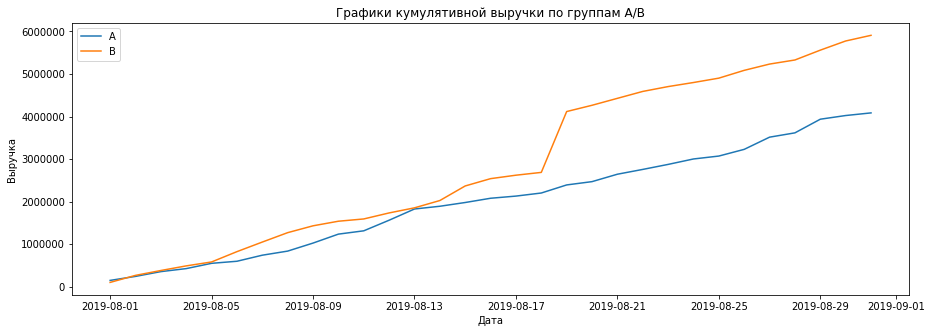

In [17]:
plt.figure(figsize=(15,5))
plt.plot(cummulative_data_a['date'], cummulative_data_a['revenue'], label = 'A')
plt.plot(cummulative_data_b['date'], cummulative_data_b['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()   
plt.show()

Выручка росла на протяжении всего теста.Но после середины теста сегмент В вырвался вперёд и лидировал до конца теста. Возможно это означает резкий рост числа заказов или появление очень дорогих заказов.



# 2.2. График кумулятивного среднего чека по группам

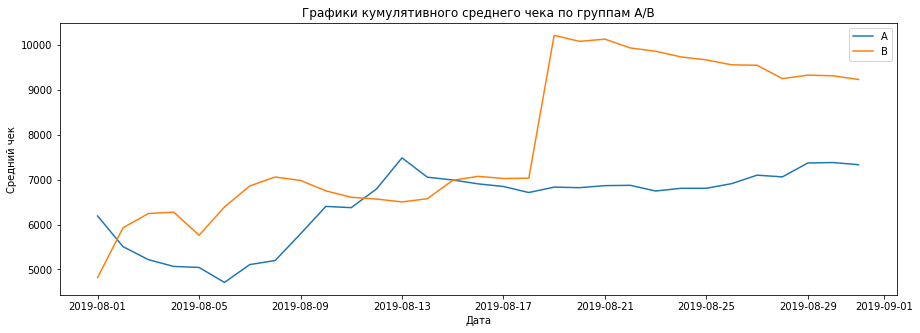

In [18]:
plt.figure(figsize=(15,5))
plt.plot(cummulative_data_a['date'], cummulative_data_a['revenue']/cummulative_data_a['orders'], label = 'A')
plt.plot(cummulative_data_b['date'], cummulative_data_b['revenue']/cummulative_data_b['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Кумулятивное значение среднего чека сильно колеблется, но после середины теста средний чек у группы В сильно вырос. Выравнивания не произошло. Возможно данных не достаточно, чтобы прийти к реальному среднему чеку.

В тоже время, как и в случае с кумулятивной выручкой. Полагаю, что это вызвано какой-то аномалией.

# 2.3.  График относительного изменения кумулятивного среднего чека группы B к группе A

In [19]:
merged_cummulative_data = cummulative_data_a.merge(cummulative_data_b, left_on='date', right_on='date', 
suffixes=['A', 'B'])
merged_cummulative_data.head(5)        

,date,revenueA,ordersA,visitorsA,revenueB,ordersB,visitorsB
0,2019-08-01,148579,24,719,101217,21,713
1,2019-08-02,242401,44,1338,266748,45,1294
2,2019-08-03,354874,68,1845,380996,61,1803
3,2019-08-04,425699,84,2562,489567,78,2573
4,2019-08-05,549917,109,3318,581995,101,3280


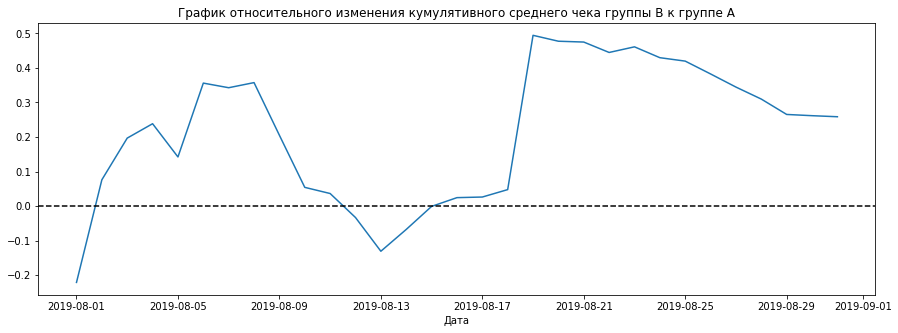

In [20]:
plt.figure(figsize=(15,5))
plt.plot(merged_cummulative_data['date'], (merged_cummulative_data['revenueB']/merged_cummulative_data['ordersB'])
/(merged_cummulative_data['revenueA']/merged_cummulative_data['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()


График слишком "ломкий". Наверняка где-то есть выбросы.



# 2.4.  График кумулятивной конверсии по группам

In [21]:
merged_cummulative_data['conversionA'] =  merged_cummulative_data['ordersA'] / merged_cummulative_data['visitorsA'] 
merged_cummulative_data['conversionB'] =  merged_cummulative_data['ordersB'] / merged_cummulative_data['visitorsB']
merged_cummulative_data.head(5)

,date,revenueA,ordersA,visitorsA,revenueB,ordersB,visitorsB,conversionA,conversionB
0,2019-08-01,148579,24,719,101217,21,713,0.033380,0.029453
1,2019-08-02,242401,44,1338,266748,45,1294,0.032885,0.034776
2,2019-08-03,354874,68,1845,380996,61,1803,0.036856,0.033833
3,2019-08-04,425699,84,2562,489567,78,2573,0.032787,0.030315
4,2019-08-05,549917,109,3318,581995,101,3280,0.032851,0.030793


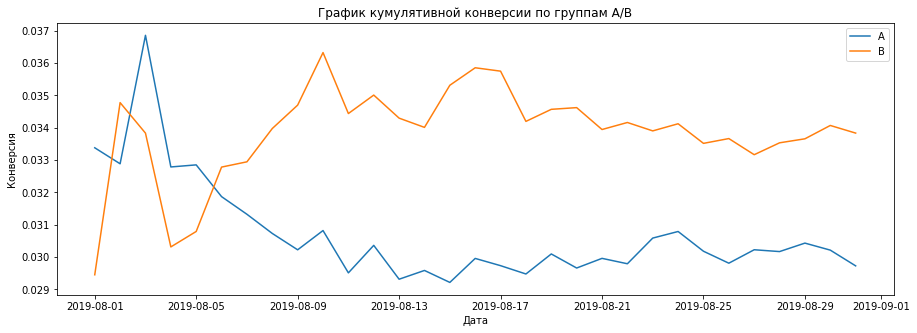

In [22]:
plt.figure(figsize=(15,5))
plt.plot(merged_cummulative_data['date'], merged_cummulative_data['conversionA'], label='A')
plt.plot(merged_cummulative_data['date'], merged_cummulative_data['conversionB'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

В самом начале теста сегмент А имел большую конверсию, но сразу начал падать. По сути на протяжении всего теста конверсия в сегменте В была выше. Фиксации около одного значения не произошло.

# 2.5.  График относительного изменения кумулятивной конверсии группы B к группе A

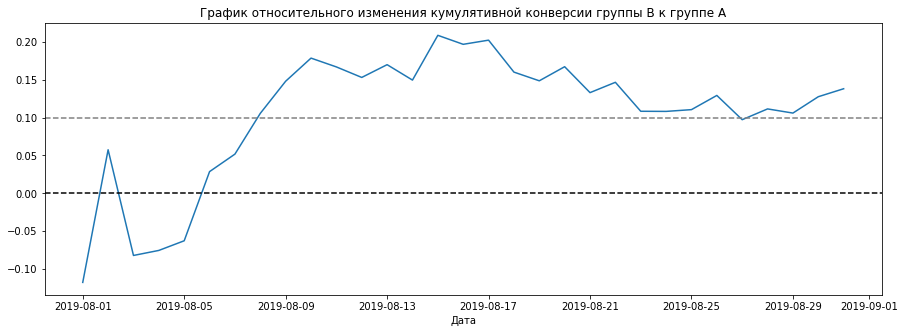

In [23]:
plt.figure(figsize=(15,5))
plt.plot(merged_cummulative_data['date'], (merged_cummulative_data['conversionB']/merged_cummulative_data['conversionA']-1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')    
plt.show()

После 1 недели теста конверсия группы В начала расти и до конца теста оставалась выше примерно на 13%



# 2.6.  Точечный график количества заказов по пользователям

In [24]:
orders_by_users = orders.groupby('visitorid', as_index = False).agg({'transactionid':'nunique'})
orders_by_users.columns = ['visitorid', 'orders']

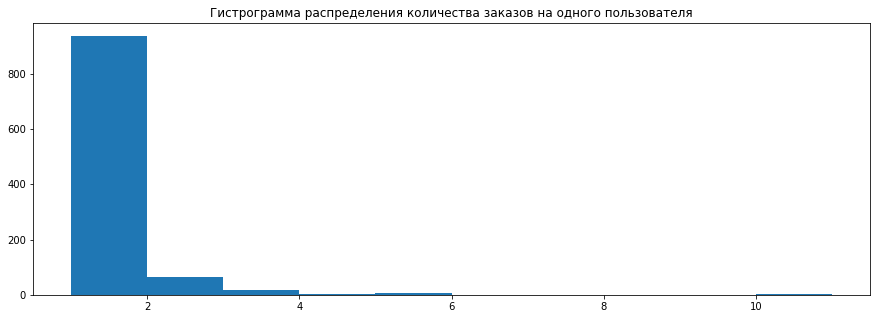

In [25]:
plt.figure(figsize=(15,5))
plt.hist(orders_by_users['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')     
plt.show()

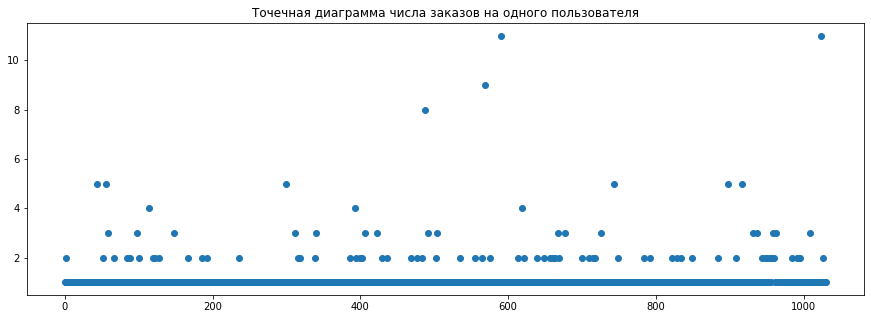

In [26]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

Судя по графику, основная масса значений лежит в пределах 2. Т.е. большинство людей не делают заказ более 2х раз.

# 2.7.  Посчитать 95-й и 99-й перцентили количества заказов на пользователя

In [27]:
percentiles = np.percentile(orders_by_users['orders'], [95, 99])
print('95-й перцентиль: {} \n99-й перцентиль: {}'. format(percentiles[0],percentiles[1]))

95-й перцентиль: 2.0 
99-й перцентиль: 4.0


Заказали более двух раз не более 5%  пользователей. И не более чем у 1% заказов более четырёх.

Логично установить границу в 2 заказа.


# 2.8.  Точечный график стоимостей заказов

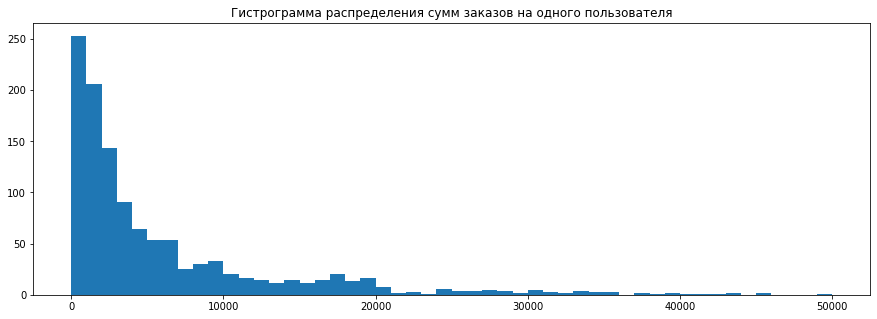

In [28]:
plt.figure(figsize=(15,5))
plt.hist(orders['revenue'], range=(0,50000), bins = 50)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()

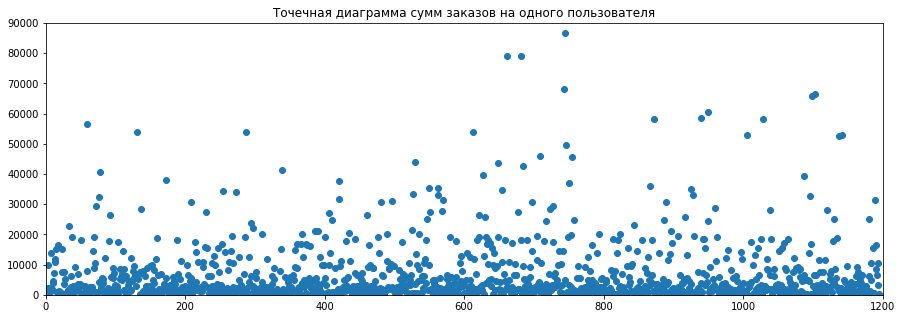

In [29]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 90000])
plt.show()

Стоимость большинства заказов не превышает 25 т.р.

Имеются выбросы в  районе 50 - 90 т.р.


# 2.9.  Посчитать 95-й и 99-й перцентили стоимости заказов

In [30]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('95-й перцентиль: {} \n99-й перцентиль: {}'. format(percentiles[0],percentiles[1]))

95-й перцентиль: 28000.000000000004 
99-й перцентиль: 58233.19999999999


Не более, чем у 5% заказов чек дороже 28 т.р. - это и будет границей, все значения более 28 т.р. считаю выбросами



# 2.10.  Статистическая значимость различий в конверсии между группами по «сырым» данным

Составлю таблицы групп А и В с сумарным колличеством поситителей по дням

In [31]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

In [32]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

Составлю таблицы групп А и В с кумулятивным колличеством поситителей по дням

In [33]:
visitors_a_cummulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].
                                               agg({'date': 'max', 'visitors_per_date_a' : 'sum'}), axis=1)
visitors_a_cummulative.columns = ['date', 'visitors_a_cummulative_a']

In [34]:
visitors_b_cummulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].
                                               agg({'date': 'max', 'visitors_per_date_b' : 'sum'}), axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_a_cummulative_b']

Составлю таблицы групп А и В с количеством транзакций и суммарной выручкой сгруппированной по дням

In [35]:
orders_a_daily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : 'nunique', 'revenue' : 'sum'})
orders_a_daily.columns = ['date', 'transactions_per_date_a', 'revenue_per_date_a']

In [36]:
orders_b_daily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : 'nunique', 'revenue' : 'sum'})
orders_b_daily.columns = ['date', 'transactions_per_date_b', 'revenue_per_date_b']

Составлю таблицы групп А и В с кумулятивным количеством транзакций и кумулятивной вырочкой сгрупированная по дням

In [37]:
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg({
                'date' : 'max',
                'transactions_per_date_a' : 'sum',
                'revenue_per_date_a' : 'sum'}), axis=1).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'transactions_cummulative_a', 'revenue_cummulative_a']

In [38]:
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg({
                'date' : 'max',
                'transactions_per_date_b' : 'sum',
                'revenue_per_date_b' : 'sum'}), axis=1).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'transactions_cummulative_b', 'revenue_cummulative_b']

Объединим полученые таблицы

In [39]:
data = orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')\
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')\
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')

In [40]:
data.head()

,date,transactions_per_date_a,revenue_per_date_a,transactions_per_date_b,revenue_per_date_b,transactions_cummulative_a,revenue_cummulative_a,transactions_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_a_cummulative_a,visitors_a_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Составлю таблицы с информацией, где пользователь совершил хотябы 1 заказ, указав число совершённых заказов

In [41]:
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid' : 'nunique'})
orders_by_users_a.columns = ['visitorid', 'orders']

orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid' : 'nunique'})
orders_by_users_b.columns = ['visitorid', 'orders']

Объявлю переменные sample_a и sample_b, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователем без заказов - нули

In [42]:
sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - \
len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - \
len(orders_by_users_b['orders'])), name='orders')], axis=0)

Применю тест Манна-Уитни, далее вычислю относительную раазницу конверсии группы В по отношении к группе А



In [43]:
print("p-value = {0:.3f}".format(st.mannwhitneyu(sample_a, sample_b,True,'less')[1]))

p-value = 0.008


In [44]:
print("Конверсия B/A по сырым данным = {0:.3f}".format(sample_b.mean()/sample_a.mean()-1))

Конверсия B/A по сырым данным = 0.138


**По "сырым" данным конверсия в группе В на 13.8% выше, т.е. разница между конверсиями статистически значима**

# 2.11.  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Снова применю тест Манна-Уитни

In [45]:
print("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'],False,'less')[1]))

p-value = 0.365


In [46]:
print("Относительное различие среднего чека B/A = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительное различие среднего чека B/A = 0.259


**По "сырым" данным относительное различие среднего чека между сегментами всего 2.5%, т.е. статистически значимых отличий в среднем чеке между группами нет**

# 2.12.  Статистическая значимость различий в конверсии между группами по «очищенным» данным

Ранее я выявил границы, по которым буду фильтровать данные: 95-й перцентиль по стоимости заказа составил 28 т.р., а по количество заказов - 2.

Сделаю срезы пользователей с числом заказов больше 2х и пользователей, совершивших заказ дороже 28 т.р.

In [47]:
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['visitorid'],
                                 orders_by_users_b[orders_by_users_b['orders'] > 2]['visitorid']], axis = 0)

users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorid']

abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()

print(abnormal_users.head(5))
print(abnormal_users.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
(74,)


Нашлось 74 аномальных поользователя. Далее посчитаю статистическую значимость по "очищеным" данным. Посмотрю, есть ли существенные различия.

В переменных **sample_a_filtered** и **sample_b_filtered** будут содержаться данные, которые не будут включать в себя аномальных пользователей. 

In [48]:
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitorid'].isin(abnormal_users))]['orders']
,pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),name='orders')],axis=0)



In [49]:
sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitorid'].isin(abnormal_users))]['orders']
,pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),name='orders')],axis=0)



In [50]:
print("p-value = {0:.3f}".format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered,True,'less')[1]))

p-value = 0.007


In [51]:
print("Конверсия B/A по очищеным данным = {0:.3f}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

Конверсия B/A по очищеным данным = 0.173


**По "очищенным" данным конверсия в группе В на 17.3% выше, что на 3.5% больше, нежели по "сырым" данным, т.е. разница между конверсиями статистически значима**

# 2.13.  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [52]:
print("p-value = {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'])[1]))

p-value = 0.369


In [53]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean() - 1))

-0.020


**По "очищенным" данным, значение p-value значительно больше 0.05, следовательно статистически значимых отличий в среднем чеке между группами нет, как и при подсчёте значений по "сырым"  данным**



# Вывод


По результатам теста выяснил, что выручка на протяжении всего теста росла. Но после середины теста сегмент В вырвался вперёд и лидировал до конца теста. Возможно это означает резкий рост числа заказов или появление очень дорогих заказов.


Кумулятивное значение среднего чека сильно колеблется, но после середины теста средний чек у группы В сильно вырос. 


В самом начале теста сегмент А имел большую конверсию, но сразу начал падать. После 1 недели теста конверсия группы В начала расти и до конца теста оставалась выше примерно на 13%.


Далее выяснил, что не более, чем 5% пользователей, заказали более 2х раз, средний чек покупки составил не более 28 т.р., для тех же 5%.

При подсчёте конверсии по "сырым" и "очищеным" данным была достигнута статистическая значимость. После "очистки" данных выявил прирост конверсии в 4%.

При подсчёте среднего чека статиистически значимых отличий обнаружено не было.

**Поскольку на протяжении всего теста группа В лидировала по показателям выручки и среднего чека, при подсчёте конверсии выявил, что конверсия в группе В выше (на 13.8% по "сырым" данным и на 17.3% по "очищенным", можно остановить тест и признать успешность его проведения и зафиксировать победу группы В)**
